In [1]:
import os
from PIL import Image
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from skimage import feature
import dlib

In [2]:
# Define emotion labels corresponding to subdirectories
emotion_labels = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
# Define a mapping dictionary from numeric labels to emotion names
emotion_names = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

In [3]:
# Define the root directory where the fer2013 dataset images are stored
# Adjust the path to the actual dataset directory
dataset_dir = './FER-2013/'

In [4]:
# Initialize empty lists to store image data and labels
train_images = []
train_labels = []
lbp_train_images = []
lbp_train_histograms = []
lbp_train_features = []

In [5]:
# Iterate through subdirectories and load images and labels
for emotion, label in emotion_labels.items():
    subdirectory_path = os.path.join(dataset_dir, 'train',emotion)
    
    # Iterate through images in each subdirectory
    for image_filename in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, image_filename)
        
        img = Image.open(image_path)
        image = img.resize((48,48))
        # Open and preprocess the image (you may need to resize or convert to grayscale)
        #image = cv2.imread(image_path)
        
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Append the image and its label to the lists
        image = np.array(image)  # Convert to NumPy array if needed
        train_images.append(image)
        train_labels.append(label)  # Convert emotion label to integer 

In [7]:
# Convert lists to NumPy arrays for further processing
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_samples = len(train_images)

# Check the shapes of the arrays
print("Images shape:", train_images.shape)
print("Labels shape:", train_labels.shape)

Images shape: (28709, 48, 48)
Labels shape: (28709,)


In [8]:
train_images[0].shape

(48, 48)

In [9]:
count = [0,0,0,0,0,0,0]
for i in range(train_samples):
    count[train_labels[i]] = count[train_labels[i]] + 1
for i in range(7):
    print(count[i])

3995
436
4097
7215
4965
4830
3171


In [10]:
r = 1
p = 8 * r

In [11]:
# Iterate through the selected sample indices
for i in range(train_samples):
    
    original_image = train_images[i]
    
    # Calculate LBP for the image
    lbp_image = feature.local_binary_pattern(original_image, P=p, R=r, method='uniform')
    
    # Calculate a histogram of the LBP image
    lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, p+3), range=(0, p+2))
    
    # Normalize the histogram to obtain a feature vector
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)  # Avoid division by zero
    
    # Append the LBP feature vector to the list
    #lbp_features.append(lbp_image.ravel())
    
    # Append the LBP image to the list
    lbp_train_images.append(lbp_image)
    
    # Append the normalized LBP histogram to the list
    lbp_train_histograms.append(lbp_hist)

In [12]:
# Convert the list of histogram vectors to a NumPy array
lbp_train_histograms = np.array(lbp_train_histograms)

# Now, 'lbp_histograms' contains the LBP histogram for each image in your dataset
print("LBP Histograms shape:", lbp_train_histograms.shape)

LBP Histograms shape: (28709, 10)


In [14]:
# Convert the list of LBP images to a NumPy array
lbp_train_images = np.array(lbp_train_images)

# Now, 'lbp_images' contains the LBP representations of all images
print("LBP Images shape:", lbp_train_images.shape)

LBP Images shape: (28709, 48, 48)


In [15]:
# You can access individual original and LBP images by indexing the arrays
# For example, to access the first original and LBP images:
index = random.randint(0, num_samples-1)
original_image = train_images[index]
lbp_image = lbp_train_images[index]
lbp_hist = lbp_train_histograms[index]
numeric_label = train_labels[index]
# Get the emotion name or 'Unknown' if not found
emotion_name = emotion_names.get(numeric_label, 'Unknown')

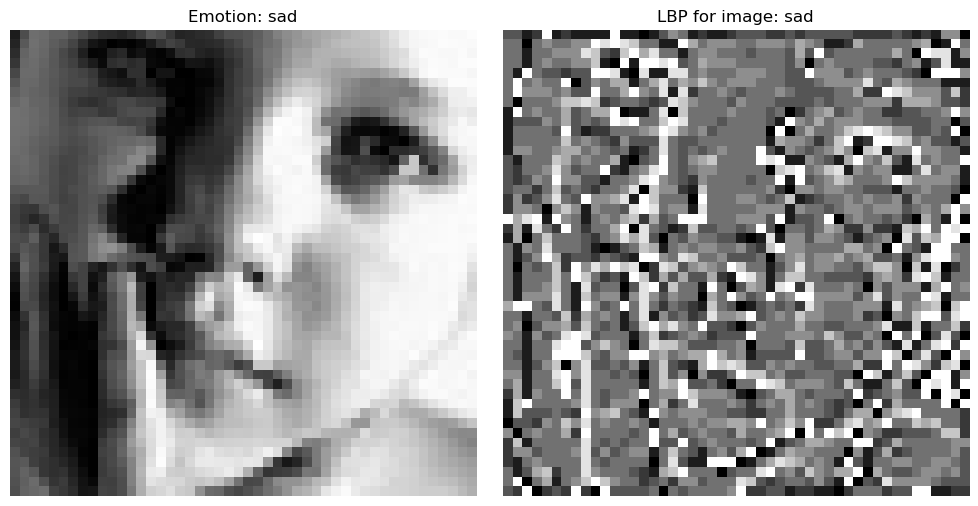

In [17]:
# Create subplots for the random image and its LBP representation
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Display the original image
ax_original = axes[0]
ax_original.imshow(original_image, cmap='gray')
ax_original.set_title(f"Emotion: {emotion_name}")
ax_original.axis('off')
    
# Display the LBP representation
ax_lbp = axes[1]
ax_lbp.imshow(lbp_image, cmap='gray')
ax_lbp.set_title(f"LBP for image: {emotion_name}")
ax_lbp.axis('off')
 
plt.tight_layout()
plt.show()

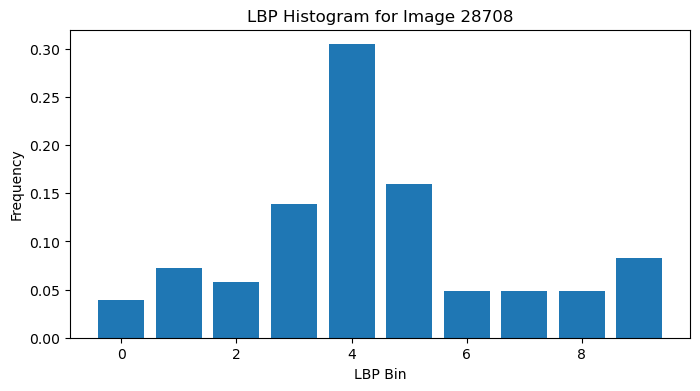

In [18]:
# Plot the histogram
plt.figure(figsize=(8, 4))
plt.bar(range(len(lbp_hist)), lbp_hist)
plt.title(f'LBP Histogram for Image {i}')
plt.xlabel('LBP Bin')
plt.ylabel('Frequency')
plt.show()

In [19]:
lbp_train_histograms

array([[0.05208333, 0.08550347, 0.07118056, ..., 0.07682292, 0.06380208,
        0.09895833],
       [0.06510417, 0.08289931, 0.07335069, ..., 0.07552083, 0.06597222,
        0.12282986],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.06163194, 0.07725694, 0.05989583, ..., 0.0625    , 0.06076389,
        0.11414931],
       [0.05989583, 0.08420139, 0.06119792, ..., 0.07465278, 0.05729167,
        0.11675347],
       [0.05512153, 0.08550347, 0.06076389, ..., 0.07074653, 0.05685764,
        0.11588542]])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Assuming 'lbp_features' contains LBP feature vectors
# Assuming 'labels' contains corresponding emotion labels
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(lbp_histograms, labels, test_size=0.2, random_state=42)

In [21]:
X_train = lbp_train_histograms
y_train = train_labels

In [22]:
# Initialize and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
# Initialize empty lists to store image data and labels
test_images = []
test_labels = []
lbp_test_images = []
lbp_test_histograms = []
lbp_test_features = []

In [34]:
# Iterate through subdirectories and load images and labels
for emotion, label in emotion_labels.items():
    subdirectory_path = os.path.join(dataset_dir, 'test', emotion)
    
    # Iterate through images in each subdirectory
    for image_filename in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, image_filename)
        
        img = Image.open(image_path)
        image = img.resize((48,48))
        # Open and preprocess the image (you may need to resize or convert to grayscale)
        #image = cv2.imread(image_path)
        
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Append the image and its label to the lists
        image = np.array(image)  # Convert to NumPy array if needed
        test_images.append(image)
        test_labels.append(label)  # Convert emotion label to integer 

In [35]:
# Convert lists to NumPy arrays for further processing
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_samples = len(test_images)

# Check the shapes of the arrays
print("Images shape:", test_images.shape)
print("Labels shape:", test_labels.shape)

Images shape: (7178, 48, 48)
Labels shape: (7178,)


In [36]:
# Iterate through the selected sample indices
for i in range(test_samples):
    
    original_image = test_images[i]
    
    # Calculate LBP for the image
    lbp_image = feature.local_binary_pattern(original_image, P=p, R=r, method='uniform')
    
    # Calculate a histogram of the LBP image
    lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, p+3), range=(0, p+2))
    
    # Normalize the histogram to obtain a feature vector
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)  # Avoid division by zero
    
    # Append the LBP feature vector to the list
    #lbp_features.append(lbp_image.ravel())
    
    # Append the LBP image to the list
    lbp_test_images.append(lbp_image)
    
    # Append the normalized LBP histogram to the list
    lbp_test_histograms.append(lbp_hist)

In [37]:
# Convert the list of histogram vectors to a NumPy array
lbp_test_histograms = np.array(lbp_test_histograms)

# Now, 'lbp_histograms' contains the LBP histogram for each image in your dataset
print("LBP Histograms shape:", lbp_test_histograms.shape)

LBP Histograms shape: (7178, 10)


In [38]:
# Convert the list of LBP images to a NumPy array
lbp_test_images = np.array(lbp_test_images)

# Now, 'lbp_images' contains the LBP representations of all images
print("LBP Images shape:", lbp_test_images.shape)

LBP Images shape: (7178, 48, 48)


In [39]:
X_test = lbp_test_histograms
y_test = test_labels

In [40]:
# Make predictions on the test data
y_pred_test = svm_classifier.predict(X_test)

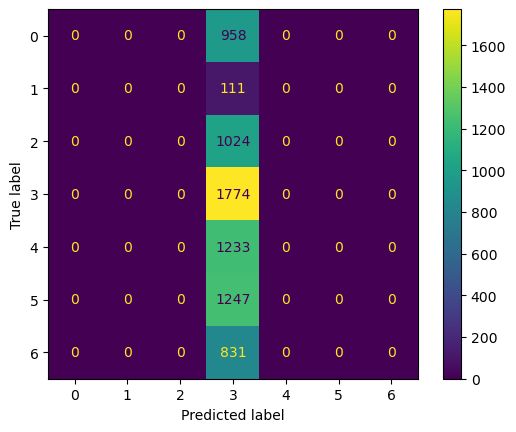

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot()
plt.show()

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

Test Accuracy: 0.24714405126776262
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       958
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00      1024
           3       0.25      1.00      0.40      1774
           4       0.00      0.00      0.00      1233
           5       0.00      0.00      0.00      1247
           6       0.00      0.00      0.00       831

    accuracy                           0.25      7178
   macro avg       0.04      0.14      0.06      7178
weighted avg       0.06      0.25      0.10      7178



C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(64,128), activation='relu', solver='adam', max_iter=750, random_state=1)
clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 128), max_iter=750, random_state=1)

In [44]:
y_pred_test  = clf.predict(X_test)

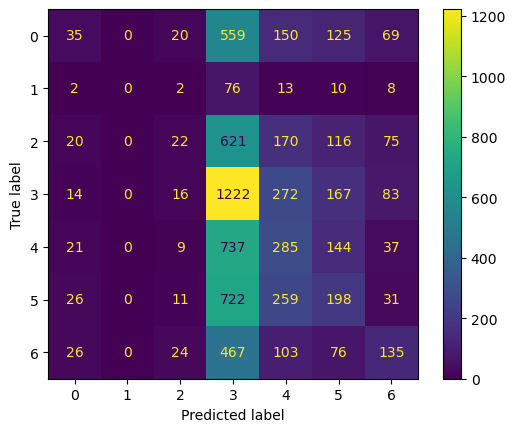

In [45]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

Test Accuracy: 0.26427974366118695
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.04      0.06       958
           1       0.00      0.00      0.00       111
           2       0.21      0.02      0.04      1024
           3       0.28      0.69      0.40      1774
           4       0.23      0.23      0.23      1233
           5       0.24      0.16      0.19      1247
           6       0.31      0.16      0.21       831

    accuracy                           0.26      7178
   macro avg       0.21      0.19      0.16      7178
weighted avg       0.25      0.26      0.21      7178



C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
